# Guide distribution plots

### Imports

In [1]:
import scanpy.api as sc

/anaconda3/envs/scvi/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from IPython.core.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
repo_path = '/Users/mincheolkim/Github/'
data_path = '/Users/mincheolkim/Documents/'

In [4]:
import sys
sys.path.append(repo_path + 'scVI')
sys.path.append(repo_path + 'scVI-extensions')

In [5]:
import os

import numpy as np
from sklearn.manifold import TSNE
from anndata import AnnData
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter
import pandas as pd
import torch
import scipy.sparse as sp_sparse
import imp
from scipy.stats import ttest_ind, wasserstein_distance, ks_2samp
import umap
from scipy.stats import norm
from sklearn.manifold import TSNE
import h5py

from scvi.metrics.clustering import entropy_batch_mixing, get_latent
from scvi.models import VAE, SVAEC, VAEC
from scvi.inference import VariationalInference

In [6]:
import scvi_extensions.dataset.supervised_data_loader as sdl
import scvi_extensions.dataset.cropseq as cs
import scvi_extensions.inference.supervised_variational_inference as svi
import scvi_extensions.hypothesis_testing.mean as mn
import scvi_extensions.hypothesis_testing.variance as vr
import scvi_extensions.dataset.label_data_loader as ldl

### Read the AnnData with tSNE coordinates

In [7]:
embedded_adata = sc.read('/Users/mincheolkim/Documents/nsnp20.raw.sng.guide_sng.norm.h5ad')

### Guide indicators

In [8]:
genes = np.unique(
    embedded_adata.obs.query('guide_cov != "0" & guide_cov != "Undetermined"')['guide_cov'].str.partition('.')[0].values)

In [9]:
for gene in genes:
    embedded_adata.obs[gene] = embedded_adata.obs['guide_cov'].str.contains(gene)

In [13]:
embedded_adata.obs['NO GUIDE'] = embedded_adata.obs['guide_cov'] == "0"

### Create heatmaps

In [14]:
%matplotlib inline

In [28]:
guides = ['NO GUIDE', 'SATB1', 'IRF2']

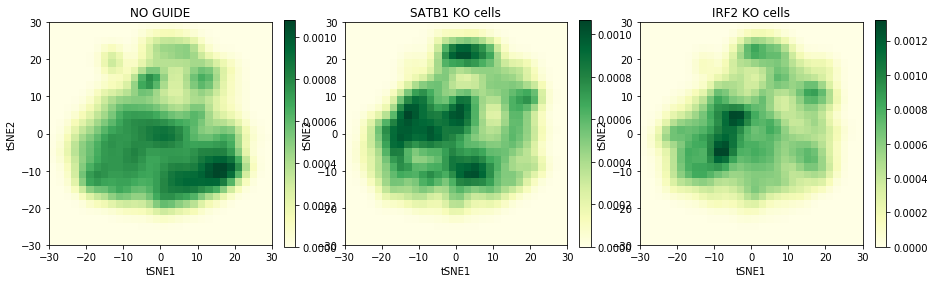

In [31]:
plt.figure(figsize=(15, 5))

for idx, guide in enumerate(guides):
    coordinates = embedded_adata.obsm['X_tsne'][embedded_adata.obs[guide], :]
    heatmap, xedges, yedges = np.histogram2d(
        coordinates[:, 0], 
        coordinates[:, 1], 
        bins=30, 
        range=[[-30, 30], [-30, 30]],
        normed=True)
    plt.subplot(1, 3, guides.index(guide)+1)
    plt.imshow(
        gaussian_filter(heatmap.T, sigma=1), 
        interpolation='nearest',  
        origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
        cmap='YlGn')
    plt.title(guide + ' KO cells' if guide != 'NO GUIDE' else guide)
    plt.savefig('satb1_irf2_tsnes.png')
    plt.colorbar(fraction=0.046)
    plt.xlabel('tSNE1');
    plt.ylabel('tSNE2');